In [5]:
!pip install numpy
!pip install pandas
!pip install python-calamine
!pip install xlrd

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:/Users/mudit.000/Downloads/telecom_users-dataset.csv")

In [51]:
df.isna().sum()

Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
Provider            6050
Age                 6050
dtype: int64

In [52]:
df["PaperlessBilling"].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
# Remove NA and redundant columns
df_clean = df.drop(columns=["Unnamed: 0", "Provider", "Age"])

# Convert TotalCharges to numeric
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

# Filter for Non-Senior Citizens
non_seniors = df_clean[df_clean["SeniorCitizen"] == 0]

# 1. Male (Non-Senior Citizens) counts
male_non_seniors = non_seniors[non_seniors["gender"] == "Male"]

male_summary = {
    "Phone Service": (male_non_seniors["PhoneService"] == "Yes").sum(),
    "Internet Service": (male_non_seniors["InternetService"] != "No").sum(),
    "Device Protection": (male_non_seniors["DeviceProtection"] == "Yes").sum(),
    "Streaming TV": (male_non_seniors["StreamingTV"] == "Yes").sum(),
    "Paperless Billing": (male_non_seniors["PaperlessBilling"] == "Yes").sum()
}

# Part 2: Female (Non-Senior Citizens) counts for specific services
female_non_seniors = non_seniors[non_seniors["gender"] == "Female"]

female_summary = {
    "Phone Service": (female_non_seniors["PhoneService"] == "Yes").sum(),
    "Internet Service": (female_non_seniors["InternetService"] != "No").sum(),
    "Device Protection": (female_non_seniors["DeviceProtection"] == "Yes").sum(),
    "Streaming TV": (female_non_seniors["StreamingTV"] == "Yes").sum(),
    "Paperless Billing": (female_non_seniors["PaperlessBilling"] == "Yes").sum()
}

male_summary, female_summary


({'Phone Service': 2336,
  'Internet Service': 1947,
  'Device Protection': 858,
  'Streaming TV': 933,
  'Paperless Billing': 1424},
 {'Phone Service': 2224,
  'Internet Service': 1863,
  'Device Protection': 817,
  'Streaming TV': 907,
  'Paperless Billing': 1401})

In [63]:


# Combine male and female summaries into one table
summary_table = pd.DataFrame([male_summary, female_summary], index=["Male (Non-Senior)", "Female (Non-Senior)"])

# Convert to tabulated string
tabulated_summary = tabulate(summary_table, headers="keys", tablefmt="fancy_grid")

print(tabulated_summary)


╒═════════════════════╤═════════════════╤════════════════════╤═════════════════════╤════════════════╤═════════════════════╕
│                     │   Phone Service │   Internet Service │   Device Protection │   Streaming TV │   Paperless Billing │
╞═════════════════════╪═════════════════╪════════════════════╪═════════════════════╪════════════════╪═════════════════════╡
│ Male (Non-Senior)   │            2336 │               1947 │                 858 │            933 │                1424 │
├─────────────────────┼─────────────────┼────────────────────┼─────────────────────┼────────────────┼─────────────────────┤
│ Female (Non-Senior) │            2224 │               1863 │                 817 │            907 │                1401 │
╘═════════════════════╧═════════════════╧════════════════════╧═════════════════════╧════════════════╧═════════════════════╛


<Figure size 1000x600 with 0 Axes>

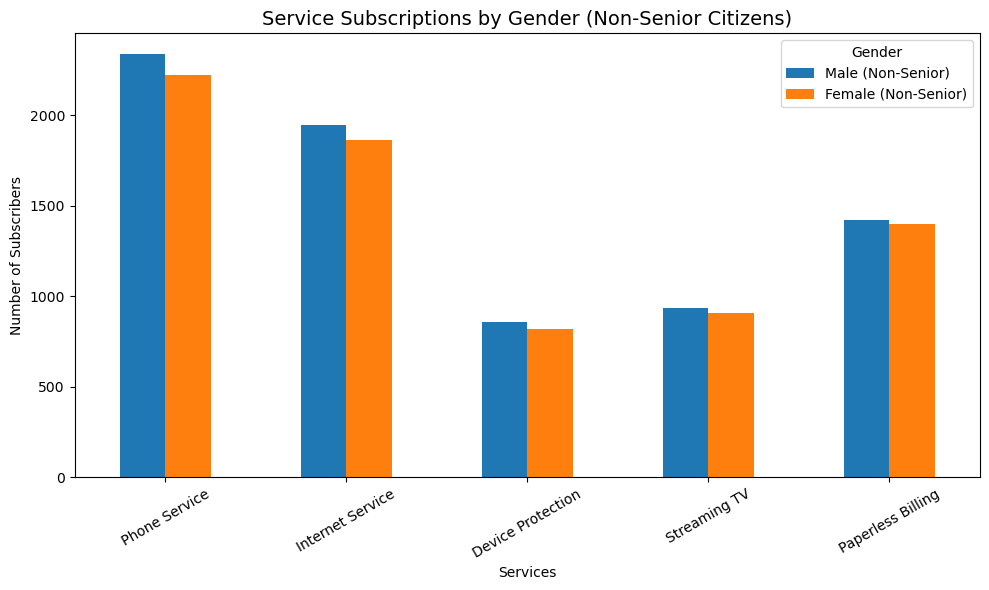

In [54]:
summary_df = pd.DataFrame([male_summary, female_summary], index=["Male (Non-Senior)", "Female (Non-Senior)"])

# Plot grouped bar chart
plt.figure(figsize=(10,6))
summary_df.T.plot(kind="bar", figsize=(10,6))

plt.title("Service Subscriptions by Gender (Non-Senior Citizens)", fontsize=14)
plt.ylabel("Number of Subscribers")
plt.xlabel("Services")
plt.xticks(rotation=30)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

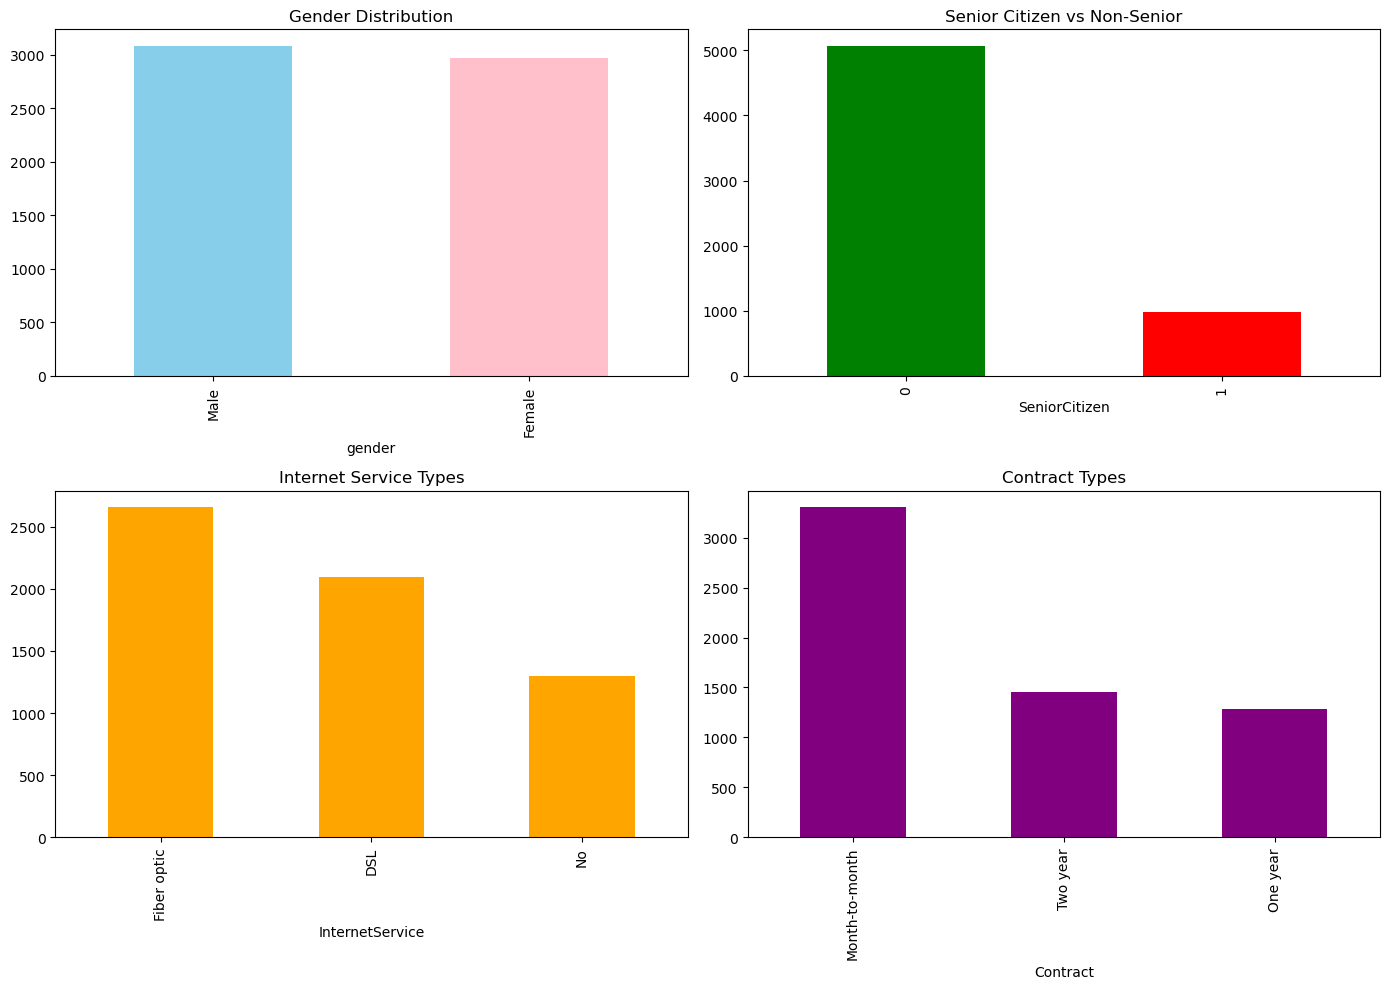

{'customerID': array(['7010-BRBUU', '9688-YGXVR', '9286-DOJGF', ..., '8044-BGWPI',
        '7450-NWRTR', '4795-UXVCJ'], dtype=object),
 'gender': array(['Male', 'Female'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([72, 44, 38,  4,  2, 70, 33,  1, 39, 55, 52, 30, 60, 50, 32, 51, 69,
        42, 14, 62,  5, 63, 67, 40, 65, 16, 46, 11, 49, 68, 10, 53, 54, 15,
         3, 71,  8, 64, 57, 20, 26, 31,  7, 35,  6, 13, 23,  9, 45, 17, 34,
        58, 12, 25, 28, 29, 43, 19, 41, 37, 27, 22, 24, 18, 56, 66, 59, 48,
        47, 61, 21,  0, 36], dtype=int64),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['Yes', 'No', 'No phone service'], dtype=object),
 'InternetService': array(['No', 'Fiber optic', 'DSL'], dtype=object),
 'OnlineSecurity': array(['No internet service', 'No', 'Yes'], dtype=object),
 'OnlineBackup': array(['No interne

In [55]:
# Display unique values from each column
unique_values = {col: df_clean[col].unique() for col in df_clean.columns}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender distribution
df_clean["gender"].value_counts().plot(kind="bar", ax=axes[0,0], color=["skyblue", "pink"])
axes[0,0].set_title("Gender Distribution")

# Senior Citizen distribution
df_clean["SeniorCitizen"].value_counts().plot(kind="bar", ax=axes[0,1], color=["green", "red"])
axes[0,1].set_title("Senior Citizen vs Non-Senior")

# Internet Service distribution
df_clean["InternetService"].value_counts().plot(kind="bar", ax=axes[1,0], color="orange")
axes[1,0].set_title("Internet Service Types")

# Contract type distribution
df_clean["Contract"].value_counts().plot(kind="bar", ax=axes[1,1], color="purple")
axes[1,1].set_title("Contract Types")

plt.tight_layout()
plt.show()

unique_values


In [65]:
# Unique values table
unique_table_data = []
for col, values in unique_values.items():
    # Convert array to string, limit to first 6 unique values for brevity
    val_list = list(values)
    display_vals = val_list[:6]
    if len(val_list) > 6:
        display_vals.append("...")
    unique_table_data.append([col, ", ".join(map(str, display_vals))])

# Create tabulated string
unique_tabulated = tabulate(unique_table_data, headers=["Column", "Unique Values (sample)"], tablefmt="fancy_grid")

print(unique_tabulated)


╒══════════════════╤════════════════════════════════════════════════════════════════════════════════════╕
│ Column           │ Unique Values (sample)                                                             │
╞══════════════════╪════════════════════════════════════════════════════════════════════════════════════╡
│ customerID       │ 7010-BRBUU, 9688-YGXVR, 9286-DOJGF, 6994-KERXL, 2181-UAESM, 4312-GVYNH, ...        │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ gender           │ Male, Female                                                                       │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ SeniorCitizen    │ 0, 1                                                                               │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ Partner          │ Yes, No                  

In [1]:

# Set style
sns.set(style="whitegrid")

# Create multiple plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Churn rate by Gender
sns.countplot(data=df_clean, x="gender", hue="Churn", ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Churn by Gender")

# 2. Churn rate by Contract type
sns.countplot(data=df_clean, x="Contract", hue="Churn", ax=axes[0,1], palette="Set1")
axes[0,1].set_title("Churn by Contract Type")
axes[0,1].tick_params(axis='x', rotation=20)

# 3. Monthly Charges distribution
sns.histplot(df_clean["MonthlyCharges"], bins=30, kde=True, ax=axes[1,0], color="teal")
axes[1,0].set_title("Distribution of Monthly Charges")

# 4. Correlation heatmap for numeric columns
numeric_df = df_clean[["tenure", "MonthlyCharges", "TotalCharges"]].dropna()
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", ax=axes[1,1])
axes[1,1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

╒═════════════════════╤═════════════════╤════════════════════╤═════════════════════╤════════════════╤═════════════════════╕
│                     │   Phone Service │   Internet Service │   Device Protection │   Streaming TV │   Paperless Billing │
╞═════════════════════╪═════════════════╪════════════════════╪═════════════════════╪════════════════╪═════════════════════╡
│ Male (Non-Senior)   │            2336 │               1947 │                 858 │            933 │                1424 │
├─────────────────────┼─────────────────┼────────────────────┼─────────────────────┼────────────────┼─────────────────────┤
│ Female (Non-Senior) │            2224 │               1863 │                 817 │            907 │                1401 │
╘═════════════════════╧═════════════════╧════════════════════╧═════════════════════╧════════════════╧═════════════════════╛


<Figure size 1000x600 with 0 Axes>

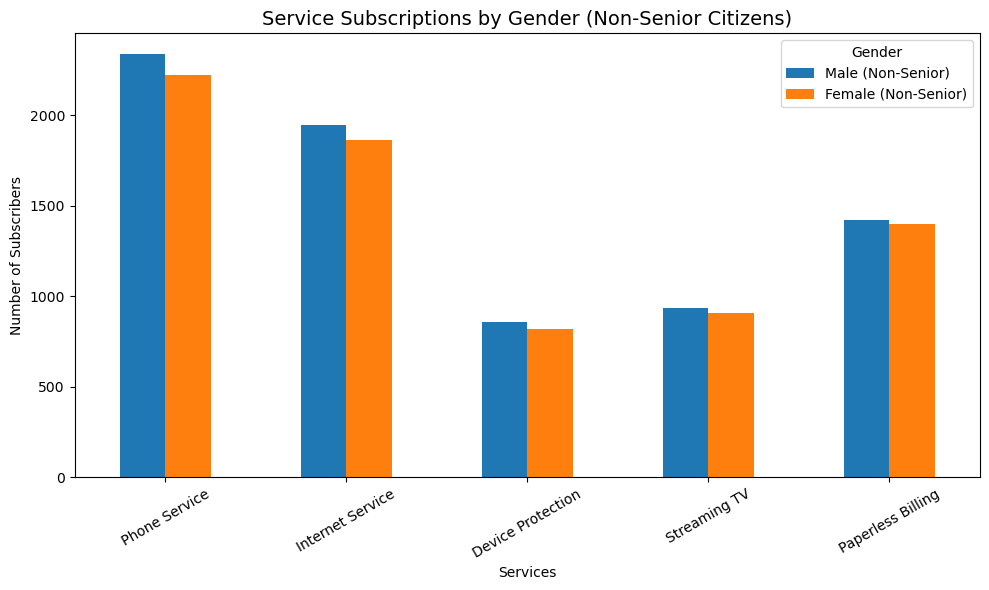

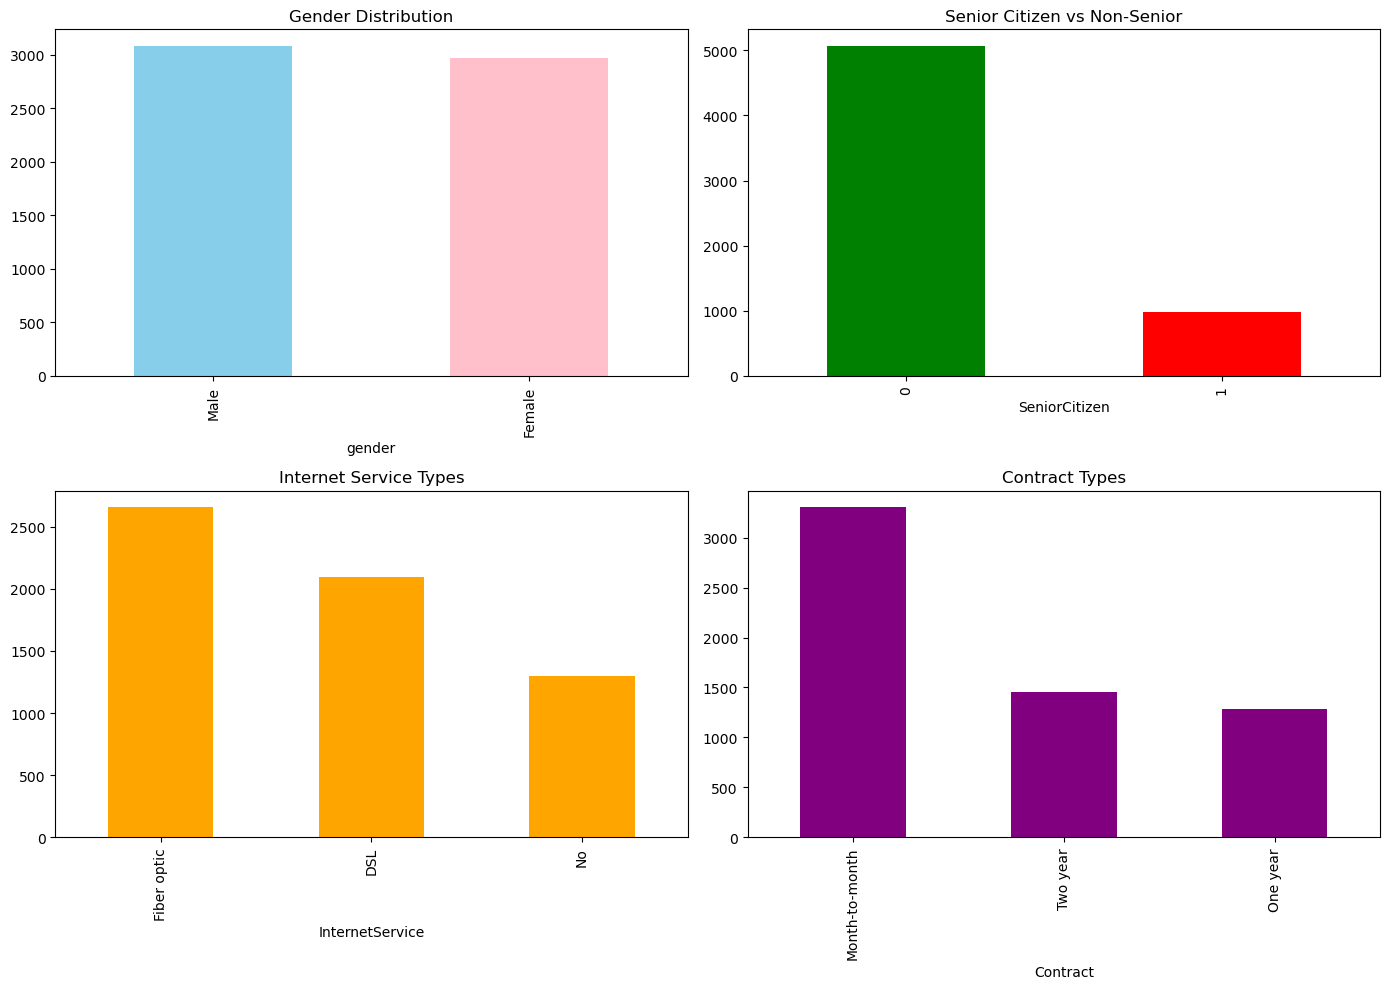

╒══════════════════╤════════════════════════════════════════════════════════════════════════════════════╕
│ Column           │ Unique Values (sample)                                                             │
╞══════════════════╪════════════════════════════════════════════════════════════════════════════════════╡
│ customerID       │ 7010-BRBUU, 9688-YGXVR, 9286-DOJGF, 6994-KERXL, 2181-UAESM, 4312-GVYNH, ...        │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ gender           │ Male, Female                                                                       │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ SeniorCitizen    │ 0, 1                                                                               │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────────┤
│ Partner          │ Yes, No                  

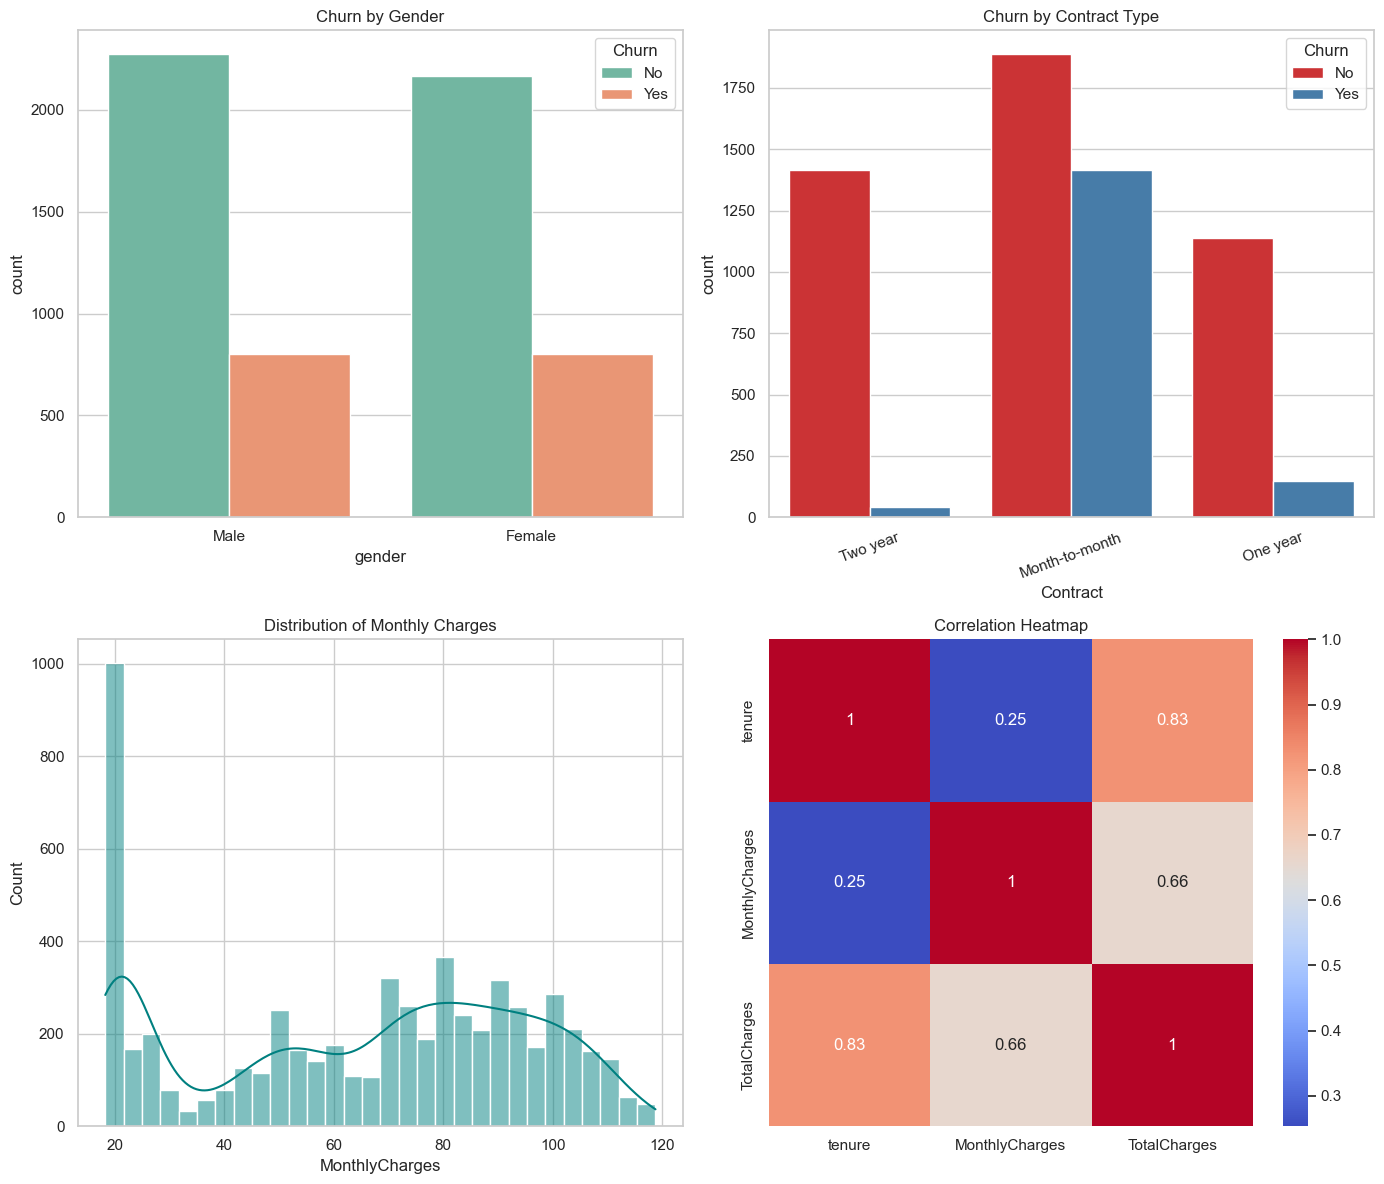

In [3]:
!pip install numpy
!pip install pandas
!pip install python-calamine
!pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv("C:/Users/mudit.000/Downloads/telecom_users-dataset.csv")

# Remove NA columns
df_clean = df.drop(columns=["Unnamed: 0", "Provider", "Age"])

# Convert TotalCharges to numeric
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

# Filter for Non-Senior Citizens
non_seniors = df_clean[df_clean["SeniorCitizen"] == 0]

# 1. Male (Non-Senior Citizens) counts
male_non_seniors = non_seniors[non_seniors["gender"] == "Male"]

male_summary = {
    "Phone Service": (male_non_seniors["PhoneService"] == "Yes").sum(),
    "Internet Service": (male_non_seniors["InternetService"] != "No").sum(),
    "Device Protection": (male_non_seniors["DeviceProtection"] == "Yes").sum(),
    "Streaming TV": (male_non_seniors["StreamingTV"] == "Yes").sum(),
    "Paperless Billing": (male_non_seniors["PaperlessBilling"] == "Yes").sum()
}

# 2. Female (Non-Senior Citizens) counts for specific services
female_non_seniors = non_seniors[non_seniors["gender"] == "Female"]

female_summary = {
    "Phone Service": (female_non_seniors["PhoneService"] == "Yes").sum(),
    "Internet Service": (female_non_seniors["InternetService"] != "No").sum(),
    "Device Protection": (female_non_seniors["DeviceProtection"] == "Yes").sum(),
    "Streaming TV": (female_non_seniors["StreamingTV"] == "Yes").sum(),
    "Paperless Billing": (female_non_seniors["PaperlessBilling"] == "Yes").sum()
}

male_summary, female_summary

summary_df = pd.DataFrame([male_summary, female_summary], index=["Male (Non-Senior)", "Female (Non-Senior)"])

# Combine male and female summaries
summary_table = pd.DataFrame([male_summary, female_summary], index=["Male (Non-Senior)", "Female (Non-Senior)"])

# Convert to tabulated string
tabulated_summary = tabulate(summary_table, headers="keys", tablefmt="fancy_grid")

print(tabulated_summary)



# Plot grouped bar chart
plt.figure(figsize=(10,6))
summary_df.T.plot(kind="bar", figsize=(10,6))

plt.title("Service Subscriptions by Gender (Non-Senior Citizens)", fontsize=14)
plt.ylabel("Number of Subscribers")
plt.xlabel("Services")
plt.xticks(rotation=30)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Display unique values from each column
unique_values = {col: df_clean[col].unique() for col in df_clean.columns}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender distribution
df_clean["gender"].value_counts().plot(kind="bar", ax=axes[0,0], color=["skyblue", "pink"])
axes[0,0].set_title("Gender Distribution")

# Senior Citizen distribution
df_clean["SeniorCitizen"].value_counts().plot(kind="bar", ax=axes[0,1], color=["green", "red"])
axes[0,1].set_title("Senior Citizen vs Non-Senior")

# Internet Service distribution
df_clean["InternetService"].value_counts().plot(kind="bar", ax=axes[1,0], color="orange")
axes[1,0].set_title("Internet Service Types")

# Contract type distribution
df_clean["Contract"].value_counts().plot(kind="bar", ax=axes[1,1], color="purple")
axes[1,1].set_title("Contract Types")

plt.tight_layout()
plt.show()

unique_values

# Unique values table
unique_table_data = []
for col, values in unique_values.items():
    # Convert array to string, limit to first 6 unique values for brevity
    val_list = list(values)
    display_vals = val_list[:6]
    if len(val_list) > 6:
        display_vals.append("...")
    unique_table_data.append([col, ", ".join(map(str, display_vals))])

# Create tabulated string
unique_tabulated = tabulate(unique_table_data, headers=["Column", "Unique Values (sample)"], tablefmt="fancy_grid")

print(unique_tabulated)

import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create multiple plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Churn rate by Gender
sns.countplot(data=df_clean, x="gender", hue="Churn", ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Churn by Gender")

# 2. Churn rate by Contract type
sns.countplot(data=df_clean, x="Contract", hue="Churn", ax=axes[0,1], palette="Set1")
axes[0,1].set_title("Churn by Contract Type")
axes[0,1].tick_params(axis='x', rotation=20)

# 3. Monthly Charges distribution
sns.histplot(df_clean["MonthlyCharges"], bins=30, kde=True, ax=axes[1,0], color="teal")
axes[1,0].set_title("Distribution of Monthly Charges")

# 4. Correlation heatmap for numeric columns
numeric_df = df_clean[["tenure", "MonthlyCharges", "TotalCharges"]].dropna()
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", ax=axes[1,1])
axes[1,1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()
